# 실습 [29-1]<br>
**실습명:  Wordcloud 분석**<br>
- STS(Standford Twitter Treebank) 데이터 사용
- 요일별로 어떤 단어가 많이 트윗되었는지 알아보기

In [ ]:
!pip install wordcloud
!pip install pytagcloud
!pip install krwordrank
!pip install pygame
!pip install simplejson

In [7]:
from matplotlib import rcParams
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pytagcloud
import random
import webbrowser

from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize

In [9]:
#1) 데이터 전처리
train_data = pd.read_csv('/content/sample_data/wordcloud.csv', encoding='latin-1', header=None)

In [10]:
train_data.columns = ['semantic', 'id', 'date', 'QUERY', 'p_id', 'text']

In [11]:
train_data['day'] = train_data['date'].apply(lambda x:x[0:3])

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   semantic  498 non-null    int64 
 1   id        498 non-null    int64 
 2   date      498 non-null    object
 3   QUERY     498 non-null    object
 4   p_id      498 non-null    object
 5   text      498 non-null    object
 6   day       498 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.4+ KB


In [13]:
day_list = train_data['day'].unique()
def article_per_day(day_list):
    total = dict()
    for i in day_list:
      label = str(i)
      print(label)
      target = pd.DataFrame(train_data.loc[train_data['day']==label])
      total[label] = target['text'].to_list()
      
    return total
      # article 돌면서 요일별로 분류

In [16]:
#2) 워드클라우드 빈도에 따라 그리기
def make_wordcloud(day): # ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
  total = article_per_day(day_list)
  text = ''

  for i in total['Tue']:
    text = text+i
  
  # nltk stopwords 
  stopwords = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}


  wordcloud = WordCloud(
      # font = font_path
      width = 800,
      height = 800
  )


  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  fig = plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.show()

Mon
Thu
Sat
Sun
Tue
Wed
Fri


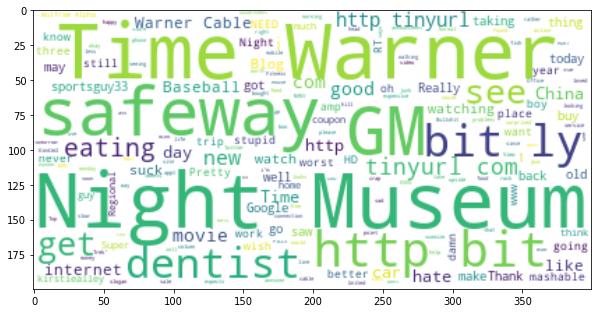

In [17]:
make_wordcloud('Wed')

# 실습 [29-2]<br>
**실습명:  네트워크 분석**<br>
- Social circles from Facebook 데이터 사용

In [22]:
#1) 환경 세팅&데이터 로드
import networkx as nx
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

# Draw the graph to screen
facebook_G = nx.read_edgelist("/content/sample_data/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [19]:
#2) 그래프 탐색
print(nx.info(facebook_G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [20]:
#3) 중심성(centrality)에 따른 탐색 및 시각화
# degree of the centrality가 평균 이상인 노드들을 체크해보자
G = nx.algorithms.centrality.degree_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

In [ ]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
                 node_size = 20, nodelist=G_overlist, node_color='#FF1744')

In [ ]:
# eigenvector centrality가 평균 이상인 노드들을 체크해보자
G = nx.algorithms.centrality.eigenvector_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

In [ ]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
                 node_size = 20, nodelist=G_overlist, node_color='#FF1744')

In [ ]:
# closeness centrality가 평균 이상인 노드들을 체크해보자
G = nx.algorithms.centrality.closeness_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

In [ ]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
                 node_size = 20, nodelist=G_overlist, node_color='#FF1744')

In [ ]:
# between centrality가 평균 이상인 노드들을 체크해보자
G = nx.algorithms.centrality.betweenness_centrality(facebook_G)
G_mean = mean(G[k] for k in G)
G_overlist = []
for i in G:
  if G[i] > G_mean:
    G_overlist.append(i)

In [ ]:
pos = nx.spring_layout(facebook_G)
plt.figure(figsize=(8,8))

plt.axis("off")
nx.draw_networkx(facebook_G, 
                 pos = pos, 
                 with_labels = False, 
                 node_size = 20, 
                 node_color= np.array(list(G.values())), 
                 node_list=G.keys(), 
                 cmap=plt.cm.Reds_r)


nx.draw_networkx(facebook_G, pos = pos, with_labels = False, 
                 node_size = 20, nodelist=G_overlist, node_color='#FF1744')

# 실습 [29-3]<br>
**실습명: 딥러닝을 이용한 감성분석**<br>
- 간단 MLP 구조로 트윗들이 긍정인지 부정인지 분류

In [24]:
#1) 환경 세팅
import json
import os
import nltk
import numpy as np

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [25]:
#2) 데이터 로드 함수
#파일은 \t을 기준으로 구성되어 있음
def read_data(filename):
    with open(filename, 'r') as f:
      data = [line.split(',', 2 )[1:] for line in f.readlines()]
    return data

In [26]:
#3) train, test 데이터 로드 함수
def gen_data():
    train_data = read_data('/content/sample_data/train_sentiment.csv')
    test_data = read_data('/content/sample_data/test_sentiment.csv')
    train_data = train_data[1:]
    test_data =  test_data[1:]
    
    train_docs = [(row[1].split(' '), row[0]) for row in train_data]
    test_docs = [(row[1].split(' '), row[0]) for row in test_data]

    return train_data, test_data

In [27]:
#4) 토큰 생성 함수
def count_token(train_docs):
    tokens = []
    print('train_docs', train_docs)
    for y in train_docs: # ['0','heelo, you know']
      tokens.extend([x for x in y[1].split(' ')])
    
    print("토큰수를 세기위한 샘플 토큰")
    print(tokens[0])
    print()
    text = nltk.Text(tokens)
    print(text, 'here')
    
    # 전체 토큰의 개수
    print("전체 토큰의 개수")
    print(len(text.tokens))
    print()
    # 중복을 제외한 토큰의 개수
    print("중복을 제외한 토큰의 개수")
    print(len([x for x in text.tokens]))
    print(text, 'herrrrrrrrrrrrrrrrrrrrrrrr')
    # 출현 빈도가 높은 상위 토큰 10개
    print("출현 빈도가 높은 상위 토큰 10개")
    print(text.vocab().most_common(10))
    print()
    return text

In [28]:
#5) 모델 설정&필요한 유틸 생성

#CountVectorization을 사용하여 데이터를 벡터화
#문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 Bag Of Words 인코딩 방식으로 벡터를 표현

def term_frequency(doc, selected_words):
    return [doc.count(word) for word in selected_words]


def set_input(text, train_docs, test_docs):
    
    selected_words = [f[0] for f in text.vocab().most_common(100)]
    print(selected_words)
    # d, _
    train_x = [term_frequency(d, selected_words) for _, d in train_docs]
    test_x = [term_frequency(d, selected_words) for _, d in test_docs]
    train_y = [c for c, _ in train_docs]
    test_y = [c for c, _ in test_docs]

    
    # data 형 변환
    x_train = np.asarray(train_x).astype('float32')
    x_test = np.asarray(test_x).astype('float32')
    y_train = np.asarray(train_y).astype('float32')
    y_test = np.asarray(test_y).astype('float32')
    return selected_words, x_train, x_test, y_train, y_test


def set_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(100,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
#6) 모델 학습 함수
def train_model(model, x_train, y_train):
    print("\n training part")
    model.fit(x_train, y_train, epochs=10, batch_size=32)
    return model

In [30]:
#7) 모델 테스트 함수
def eval_model(model, x_test, y_test):
    print("\n evaluation part")
    results = model.evaluate(x_test, y_test)
    print(results)

In [31]:
#메인 함수
if __name__ == '__main__':
    
    train_docs, test_docs = gen_data()
    # 학습데이터 샘플
    print(train_docs[0])
    
    text = count_token(train_docs)
    selected_words, x_train, x_test, y_train, y_test = set_input(text, train_docs, test_docs)
    
    model = set_model()

    # 입력데이터 표현
    # x_train, y_train
    print("입력데이터 표현")
    print(x_train[0])
    print(y_train[0])
    print()

    model = train_model(model, x_train, y_train)
    eval_model(model, x_test, y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



토큰수를 세기위한 샘플 토큰
"@switchfoot

<Text: "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. ...> here
전체 토큰의 개수
23011409

중복을 제외한 토큰의 개수
23011409
<Text: "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. ...> herrrrrrrrrrrrrrrrrrrrrrrr
출현 빈도가 높은 상위 토큰 10개
[('\n', 911273), ('', 752262), ('to', 552763), ('the', 486945), ('I', 485288), ('a', 365995), ('my', 278826), ('and', 274924), ('"\n', 266017), ('i', 246187)]

['\n', '', 'to', 'the', 'I', 'a', 'my', 'and', '"\n', 'i', 'is', 'you', 'for', 'in', 'of', 'it', 'on', 'have', 'so', 'me', 'that', 'with', 'be', 'but', 'at', 'was', "I'm", 'just', 'not', 'this', 'get', 'like', 'are', 'up', 'all', '-', 'out', 'go', 'your', 'good', 'day', 'do', 'from', 'got', 'now', 'going', 'love', 'no', 'about', 'will', 'work', 'back', 'u', "it's", 'some', 'am', "don't", 'can', 'really', 'see', 'know', 'had', 'one', '&amp;', 'too', 'we', 'want', 'time', 'what', 'think', 'im', 'as', "can't", 'new', 'when', 'its', 'still', '2', 'if', 'an', 'mi